# Image Classification with Convolutional neural networks

In [1]:
from tensorflow.keras import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain),(xtest,ytest) = datasets.fashion_mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
cnames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

9 Ankle boot


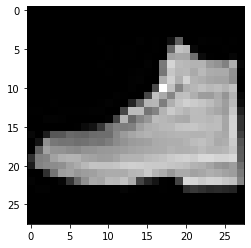

In [4]:
ind=50000
print(ytrain[ind],cnames[ytrain[ind]])
plt.imshow(xtrain[ind],cmap='gray')
plt.show()

### Data processing

In [5]:
# scale the images
xtrain = xtrain/255
xtest = xtest/255

In [6]:
# onehot encode the labels
print(ytrain.shape)
print(ytest.shape)
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000,)
(10000,)
(60000, 10)
(10000, 10)


In [7]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
# samples, rows, cols, channel
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)

In [9]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Modelling the CNN

<img src="https://miro.medium.com/max/2000/1*1TI1aGBZ4dybR6__DI9dzA.png">

In [10]:
from tensorflow.keras import models,layers

In [30]:
# add the input layer
ip = layers.Input(shape=(28,28,1))

# first conv layer
conv1 = layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu')(ip)
conv2 = layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu')(conv1)

# add the maxpooling layer
mp1 = layers.MaxPooling2D()(conv2)

# add the conv layer
conv3 = layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu')(mp1)
conv4 = layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu')(conv3)

# add the maxpooling layer
mp2 = layers.MaxPooling2D(pool_size=(2,2))(conv4)

# add the flatten layer
ft = layers.Flatten()(mp2)

# add dense layers
d1 = layers.Dense(120,activation='relu')(ft)

# add dense layers
d2 = layers.Dense(84,activation='relu')(d1)

# ouput layer
op = layers.Dense(10,activation='softmax')(d2)

model = models.Model(inputs=ip,outputs=op)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 30)        2730      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 40)        10840     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 50)          18050     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 50)          0   

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=1000,validation_data=(xtest,ytest))

Epoch 1/10
60/60 [==============================] - 45s 745ms/step - loss: 1.0340 - accuracy: 0.6462 - val_loss: 0.6420 - val_accuracy: 0.7403
Epoch 2/10
60/60 [==============================] - 37s 622ms/step - loss: 0.5615 - accuracy: 0.7844 - val_loss: 0.5275 - val_accuracy: 0.8037
Epoch 3/10
60/60 [==============================] - 38s 637ms/step - loss: 0.4881 - accuracy: 0.8179 - val_loss: 0.5037 - val_accuracy: 0.8185
Epoch 4/10
60/60 [==============================] - 44s 741ms/step - loss: 0.4373 - accuracy: 0.8404 - val_loss: 0.4555 - val_accuracy: 0.8318
Epoch 5/10
60/60 [==============================] - 36s 605ms/step - loss: 0.3998 - accuracy: 0.8542 - val_loss: 0.4110 - val_accuracy: 0.8527
Epoch 6/10
60/60 [==============================] - 46s 773ms/step - loss: 0.3677 - accuracy: 0.8672 - val_loss: 0.3939 - val_accuracy: 0.8555
Epoch 7/10
60/60 [==============================] - 38s 637ms/step - loss: 0.3476 - accuracy: 0.8745 - val_loss: 0.3704 - val_accuracy: 0.8690

In [32]:
ypred = model.predict(xtest)
print(ypred.shape)
ypred = [np.argmax(i) for i in ypred]
ytest2 = [np.argmax(i) for i in ytest]

(10000, 10)


In [33]:
from sklearn import metrics
print(metrics.classification_report(ytest2,ypred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.79      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.79      0.84      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.65      0.74      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.88      0.89     10000



In [34]:
cnames[6]

'Shirt'

In [35]:
pd.DataFrame(metrics.confusion_matrix(ytest2,ypred),columns=cnames,index=cnames)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,767,1,18,27,7,1,170,0,9,0
Trouser,1,969,1,21,3,0,3,0,2,0
Pullover,8,0,789,7,101,1,91,0,3,0
Dress,8,4,10,891,37,0,46,0,4,0
Coat,0,1,41,23,844,0,90,0,1,0
Sandal,0,0,0,0,0,970,0,19,0,11
Shirt,87,3,64,23,70,0,741,0,12,0
Sneaker,0,0,0,0,0,10,0,957,1,32
Bag,3,0,8,7,5,2,6,5,963,1
Ankle boot,1,0,0,0,0,7,0,41,0,951


### Exploring the CNN model

In [47]:
wt = model.weights
len(wt)

14

In [48]:
for w in wt:
    print(w.shape)

(3, 3, 1, 10)
(10,)
(3, 3, 10, 30)
(30,)
(3, 3, 30, 40)
(40,)
(3, 3, 40, 50)
(50,)
(800, 120)
(120,)
(120, 84)
(84,)
(84, 10)
(10,)


In [49]:
firstwt = wt[0].numpy()
firstwt.shape

(3, 3, 1, 10)

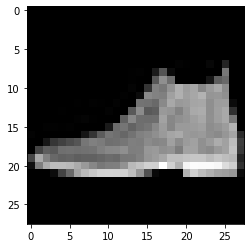

In [50]:
model2 = models.Model(inputs=ip,outputs=conv1)
plt.imshow(xtest[0].reshape(28,28),cmap='gray')
plt.show()

In [51]:
preds = model2.predict(xtest[0].reshape(1,28,28,1))
preds.shape

(1, 26, 26, 10)

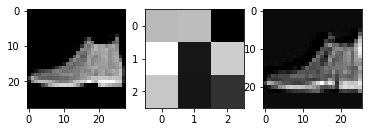

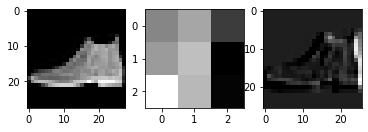

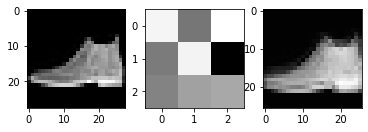

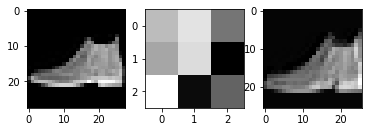

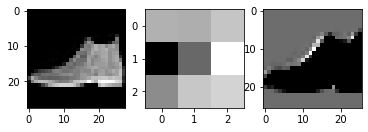

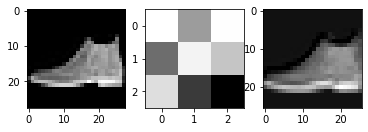

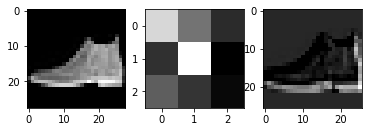

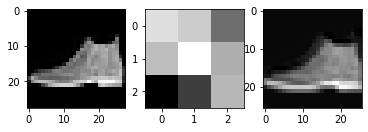

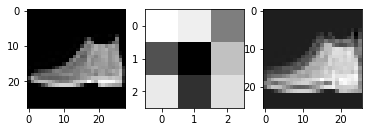

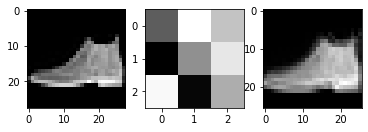

In [52]:
for i in range(10):
    plt.subplot(131)
    plt.imshow(xtest[0].reshape(28,28),cmap='gray')
    plt.subplot(132)
    plt.imshow(firstwt[:,:,0,i].reshape(3,3),cmap='gray')
    plt.subplot(133)
    plt.imshow(preds[:,:,:,i].reshape(26,26),cmap='gray')
    plt.show()